<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [24]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# if we want to see all columns, we set this parametr on
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



ERROR:root:File `'py/dataframecheck.py'` not found.


In [25]:
# read dataset
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


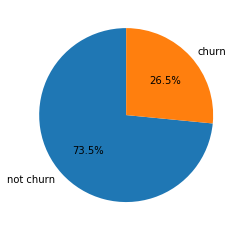

In [9]:
plt.pie(df["Churn"].value_counts(),labels=('not churn','churn'), autopct ='%1.1f%%', startangle = 90,labeldistance = 1.1)
plt.show()

In [10]:
 # remove customer ID as it's not helpful fro data analysis and prediction
df = df.drop(['customerID'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [27]:
# for each column set all letters to lower case
df.columns = map(str.lower, df.columns)

In [12]:
df.TotalCharges.value_counts()

20.2       11
           11
19.75       9
20.05       8
19.9        8
           ..
6471.85     1
1978.65     1
400         1
6019.35     1
208         1
Name: TotalCharges, Length: 6531, dtype: int64

In [28]:
# select columns name for future work
list(df.columns.values.tolist())

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [29]:
df.duplicated().any()


False

In [13]:
 #there appear to be 11 empty values. Let's replace them with nan. and since it's less than .2% of the data we can drop them
df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
df.dropna(inplace=True)

In [14]:
for col in df.columns:
    display(df[col].value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

No     3639
Yes    3393
Name: Partner, dtype: int64

No     4933
Yes    2099
Name: Dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

Yes    6352
No      680
Name: PhoneService, dtype: int64

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

20.05     61
19.85     44
19.90     44
19.95     44
19.65     43
          ..
92.35      1
35.60      1
72.85      1
67.70      1
113.30     1
Name: MonthlyCharges, Length: 1584, dtype: int64

20.2       11
19.75       9
19.65       8
20.05       8
19.9        8
           ..
6471.85     1
1978.65     1
400         1
6019.35     1
208         1
Name: TotalCharges, Length: 6530, dtype: int64

No     5163
Yes    1869
Name: Churn, dtype: int64

In [15]:
cols=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
     'StreamingTV', 'StreamingMovies', 'Contract']
for col in cols:
    df[col] = df[col].apply(lambda x: x.replace("service", "").strip().replace(" ","_").replace("-","_"))
    display(df[col].value_counts())

# PaymentMethod
df['PaymentMethod'] = df['PaymentMethod'].apply(lambda x: x.replace("automatic", "").replace("(", "").replace(")", "").strip())
df['PaymentMethod'] = df['PaymentMethod'].apply(lambda x: x.strip().replace(" ","_").replace("\(automatic\)", ""))
display(df['PaymentMethod'].value_counts())

No          3385
Yes         2967
No_phone     680
Name: MultipleLines, dtype: int64

Fiber_optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

No             3497
Yes            2015
No_internet    1520
Name: OnlineSecurity, dtype: int64

No             3087
Yes            2425
No_internet    1520
Name: OnlineBackup, dtype: int64

No             3094
Yes            2418
No_internet    1520
Name: DeviceProtection, dtype: int64

No             3472
Yes            2040
No_internet    1520
Name: TechSupport, dtype: int64

No             2809
Yes            2703
No_internet    1520
Name: StreamingTV, dtype: int64

No             2781
Yes            2731
No_internet    1520
Name: StreamingMovies, dtype: int64

Month_to_month    3875
Two_year          1685
One_year          1472
Name: Contract, dtype: int64

Electronic_check    2365
Mailed_check        1604
Bank_transfer       1542
Credit_card         1521
Name: PaymentMethod, dtype: int64

In [18]:
df['Churn'] = df['Churn'].apply(lambda x: x.strip().replace("Yes", "1").replace("No", "0"))
df['Churn'] = df['Churn'].astype('int')
df['Churn']

AttributeError: 'int' object has no attribute 'strip'

In [ ]:
# stepwise model
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
X =outliers_removed.drop('price', axis=1)
y = outliers_removed['price']
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)